# Weka machine learning toolkit

* [Download Weka](https://www.cs.waikato.ac.nz/~ml/weka/)
* [Data mining with Weka video series](https://www.youtube.com/user/WekaMOOC)

# Exercise 6

For this exercise you can use either Python with sklearn or Weka.

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

In [1]:
import math
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("agaricus-lepiota.csv", delimiter=",")
print(df.shape)
df.describe()

(8124, 23)


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


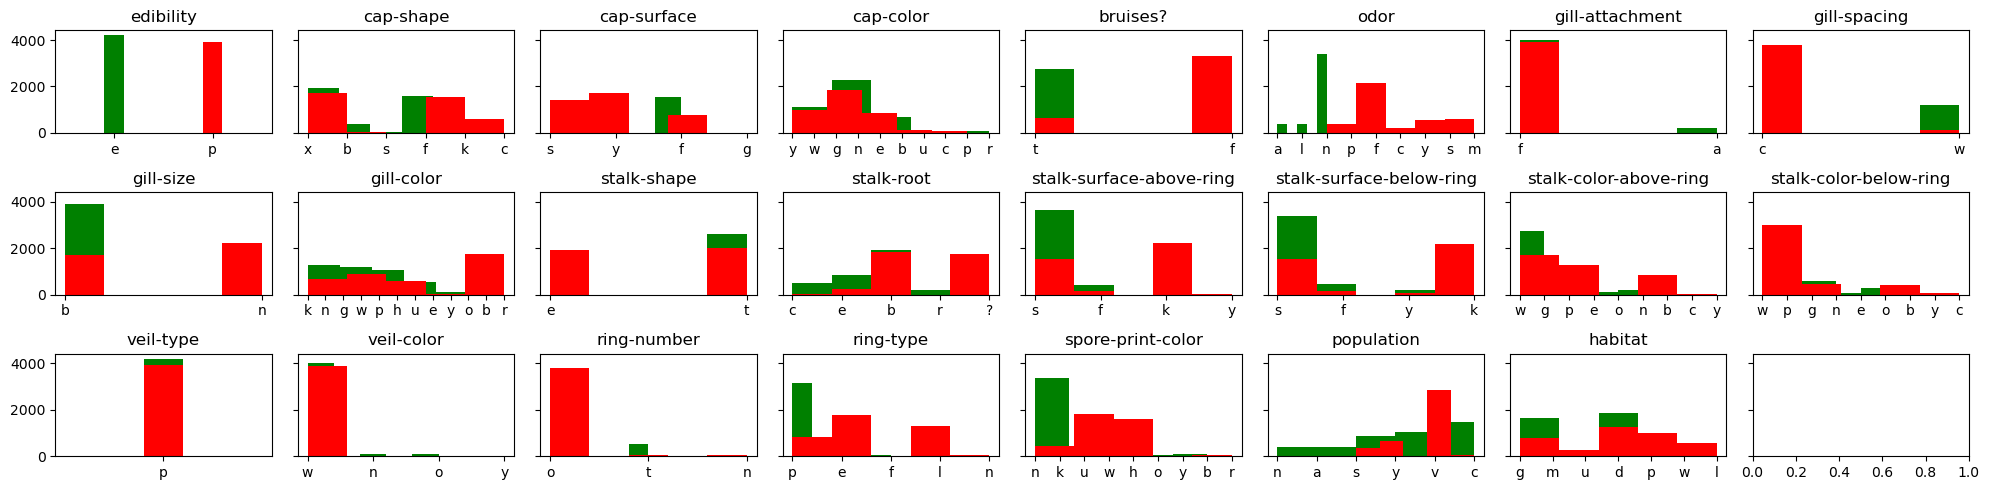

In [3]:
edible = df[df["edibility"] == 'e']
not_edible = df[df["edibility"] == 'p']

cols = math.ceil(len(df.columns)/3)
fig, axs = plt.subplots(3, cols,sharey=True, tight_layout=True, figsize=(20,5))

for i, h in enumerate(edible.columns):
    row = math.floor(i / cols)
    column = i % cols
    axs[row][column].title.set_text(h)
    axs[row][column].hist(edible[h], bins=5, color="green")
    axs[row][column].hist(not_edible[h], bins=5, color="red")

# Analysis

Based on these graphs I would guess the best features are: spore-print-color, population, bruises?, odor, gill-spacing
Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?

In [59]:
df_dummy = pd.get_dummies(df)

skb = SelectKBest(chi2, k=6)

X = df_dummy.values # data
y = df_dummy[["edibility_e"]] #classification

print(X.shape)
print(y.shape)
skb.fit(X,y)
X_new = skb.transform(X)

print(X_new.shape)
print([df_dummy.columns[i] for i in skb.get_support(indices=True)])

(8124, 119)
(8124, 1)
(8124, 6)
['edibility_e', 'edibility_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']


2) Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?

In [62]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_dummy),columns = df_dummy.columns)

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

      edibility_e  edibility_p  cap-shape_b  cap-shape_c  cap-shape_f  \
PC-1    -0.251666     0.251666    -0.072776    -0.000586     0.011454   
PC-2     0.005977    -0.005977     0.013945     0.008085    -0.041309   

      cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  \
PC-1     0.074615    -0.012113    -0.021513      -0.035675      -0.003610   
PC-2     0.134793     0.001355    -0.048466      -0.118880       0.004908   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
PC-1  ...     -0.096427      0.142253     -0.008127  -0.024081  -0.066152   
PC-2  ...     -0.013749      0.088743     -0.149155  -0.049772  -0.066762   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
PC-1   0.066851  -0.069250   0.126341  -0.027780  -0.030551  
PC-2   0.179449  -0.018278  -0.009255  -0.008384   0.050352  

[2 rows x 119 columns]


3) Do you see any overlap between the PCA features and those obtained from feature selection?